In [90]:
# 1.3

import numpy as np

mean = np.array([[0], [0]])
uncertain = np.array([[0, 0], [0, 0]])
A = np.array([[1, 1], [0, 1]])
G = np.array([[0.5], [1]])



for i in range(1, 6):
    mean = A @ mean
    uncertain = A.dot(uncertain).dot(A.T) + 1 * G.dot(G.T)
    print("The value of mean is {} at {}".format(mean, i))
    print("The value of uncertain is {} at {}".format(uncertain, i))


The value of mean is [[0]
 [0]] at 1
The value of uncertain is [[0.25 0.5 ]
 [0.5  1.  ]] at 1
The value of mean is [[0]
 [0]] at 2
The value of uncertain is [[2.5 2. ]
 [2.  2. ]] at 2
The value of mean is [[0]
 [0]] at 3
The value of uncertain is [[8.75 4.5 ]
 [4.5  3.  ]] at 3
The value of mean is [[0]
 [0]] at 4
The value of uncertain is [[21.  8.]
 [ 8.  4.]] at 4
The value of mean is [[0]
 [0]] at 5
The value of uncertain is [[41.25 12.5 ]
 [12.5   5.  ]] at 5


In [ ]:
# 1.4

import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt


def create_ellipse(mean, cov, t):
    p = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    r_x = np.sqrt(1 + p)
    r_y = np.sqrt(1 - p)
    e = Ellipse((0, 0), width=r_x * 2, height=r_y * 2,
                      facecolor='none', edgecolor = "blue")
    
    s_x = np.sqrt(cov[0, 0])
    m_x = mean[0]
    
    s_y = np.sqrt(cov[1, 1])
    m_y = mean[1]
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(s_x, s_y) \
        .translate(m_x, m_y)

    e.set_transform(transf + ax.transData)
    
    ax.add_patch(e)
    
    ax.scatter(mean[0], mean[1], c = "blue", s = 3)
    
    ax.set_title("Velocity and Position when time is " + str(t))
    ax.set_xlabel("Position")
    ax.set_ylabel("Velocity")





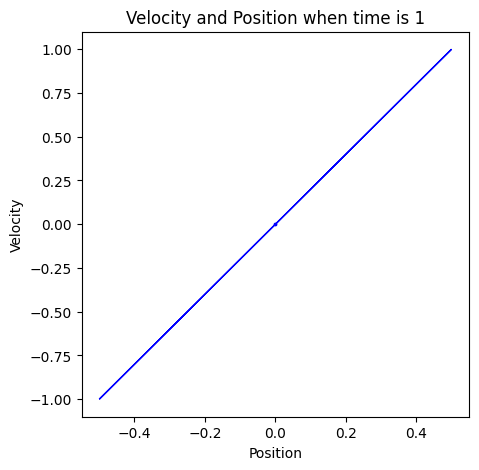

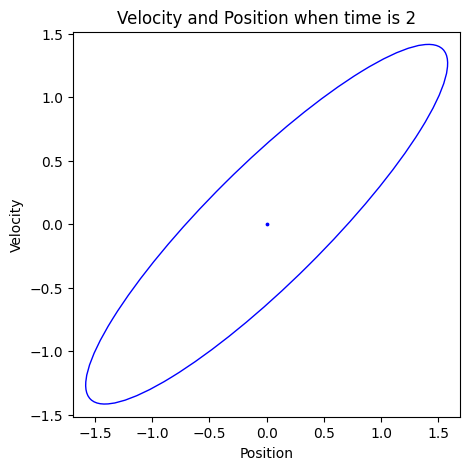

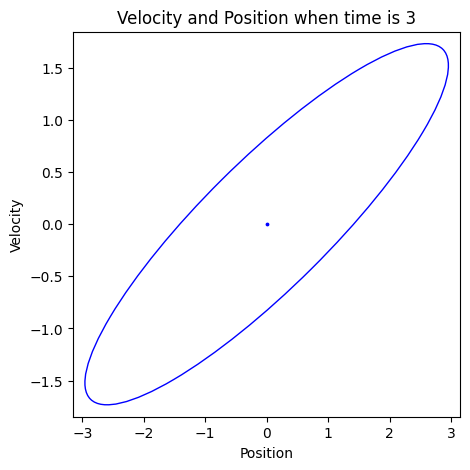

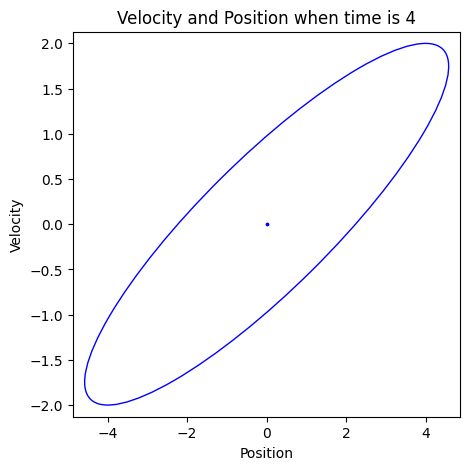

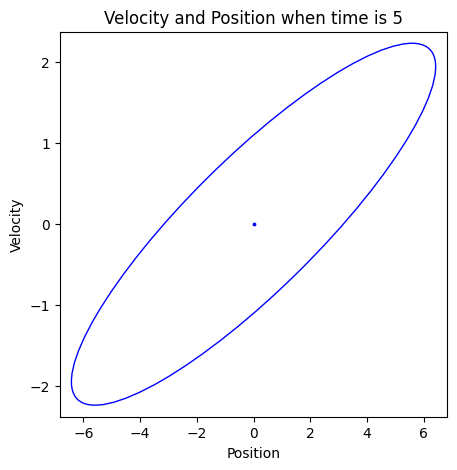

In [179]:
import numpy as np

mean = np.array([[0], [0]])
uncertain = np.array([[0, 0], [0, 0]])
A = np.array([[1, 1], [0, 1]])
G = np.array([[0.5], [1]])



for i in range(1, 6):
    mean = A @ mean
    uncertain = A.dot(uncertain).dot(A.T) + 1 * G.dot(G.T)
    
    create_ellipse(mean, uncertain, i)

In [91]:
# 2.2

import numpy as np

mean = np.array([[0], [0]])
uncertain = np.array([[0, 0], [0, 0]])
A = np.array([[1, 1], [0, 1]])
G = np.array([[0.5], [1]])



for i in range(1, 6):
    mean = A @ mean
    uncertain = A @ uncertain @ A.T + 1 * G @ G.T
    print("The value of mean is {} at {}".format(mean, i))
    print("The value of uncertain is {} at {}".format(uncertain, i))

The value of mean is [[0]
 [0]] at 1
The value of uncertain is [[0.25 0.5 ]
 [0.5  1.  ]] at 1
The value of mean is [[0]
 [0]] at 2
The value of uncertain is [[2.5 2. ]
 [2.  2. ]] at 2
The value of mean is [[0]
 [0]] at 3
The value of uncertain is [[8.75 4.5 ]
 [4.5  3.  ]] at 3
The value of mean is [[0]
 [0]] at 4
The value of uncertain is [[21.  8.]
 [ 8.  4.]] at 4
The value of mean is [[0]
 [0]] at 5
The value of uncertain is [[41.25 12.5 ]
 [12.5   5.  ]] at 5


In [122]:
# 2.2
import numpy as np

predict_mean = np.array([[0], [0]])
predict_uncertain = np.array([[41.25, 12.5], [12.5, 5]])
C = np.array([[1, 0]])
Q = 8

K = predict_uncertain @ C.T @ np.linalg.inv(C @ predict_uncertain @ C.T + Q)

measurement_mean = predict_mean + K @ (np.array([[10]]) - C @ predict_mean)

I = np.eye(2)

measurement_uncertain = (I - K @ C) @ predict_uncertain

print("The value of measurement mean is {} and measurement uncertain is {}".format(measurement_mean, measurement_uncertain))


The value of measurement mean is [[8.37563452]
 [2.53807107]] and measurement uncertain is [[6.70050761 2.03045685]
 [2.03045685 1.82741117]]


In [103]:
# 2.2
import numpy as np
N = 100
true_position = np.random.normal(10, 8, size=N)

print(true_position)

[ 10.94766047   3.85450114  17.26509406  13.11397216  13.54178106
   2.10113434   5.85419779  16.41237751   4.24278841  19.34985541
  14.12972063   3.30962988  18.1140544  -10.8369211   12.36101741
  15.26025055   3.84178326  19.86515039   4.98130331   5.94047368
   8.93274837  -2.14939406   9.90859771  19.52599347  13.64741643
   7.35496543  17.42648318  16.3583151   21.33553252  15.82559423
   5.53647783   8.8064902   19.66084316   1.4156878   16.79090575
   7.38604998  11.0975374   21.72987562  19.4681151   13.08969174
   1.35931918   1.84328983  17.86923279   8.13759663  18.65141098
   6.83405355  14.55384333   6.39641085  -0.13935     -8.99638304
   8.82920548   6.93475749  -3.02297961  16.67267138  24.1454014
  11.25925709  13.23656743   6.48181091   9.58187691  11.7568517
   6.15598802   0.76231715  24.08589847   8.2937273   10.63907285
  10.72980995   8.78369457  20.96378083  11.99728886   3.85793399
  -1.99557392  15.406595    17.99381927   3.65344815  13.04870285
   1.7588637

In [174]:
# 2.3

import numpy as np
import random

# initilize from the previous predict value at t = 5 
mean = np.array([[0], [0]])
uncertain = np.array([[41.25, 12.5], [12.5, 5]])
A = np.array([[1, 1], [0, 1]])
G = np.array([[0.5], [1]])

probablity = [0.1, 0.5, 0.9]


mean_store = mean
uncertain_store = uncertain
position_error_list = []

# different probability
for p in probablity:
    # if fails, use the prediction value
    mean = mean_store
    uncertain = uncertain_store

    total_position_error = 0
    # simulate 100 times each time to get mean error
    for j in range(0, 100):
        # get predict value to 20
        for i in range(6, 21):
            mean = A @ mean
            uncertain = A @ uncertain @ A.T + 1 * G @ G.T

        # get random number from 0 to 1
        random_prob = random.random()

        C = np.array([[1, 0]])
        Q = 8

        # if sensor is good, Z is the normal distribution
        if random_prob > p:
            Z = np.random.normal(10, 8)

        # if sensor fails working, Z does not exist
        else:
            Z = 0

        # get measurement mean
        K = uncertain @ C.T @ np.linalg.inv(C @ uncertain @ C.T + Q)

        measurement_mean = mean + K @ (np.array([[Z]]) - C @ mean)

        I = np.eye(2)

        # measurement_uncertain = (I - K @ C) @ uncertain

        total_position_error = total_position_error + measurement_mean[0][0]

    position_error_list.append(total_position_error/50)

for i in position_error_list:
    print("The value of position error is {}".format(i))





The value of position error is 18.797114725045294
The value of position error is 9.712989784579065
The value of position error is 1.1352818409234513


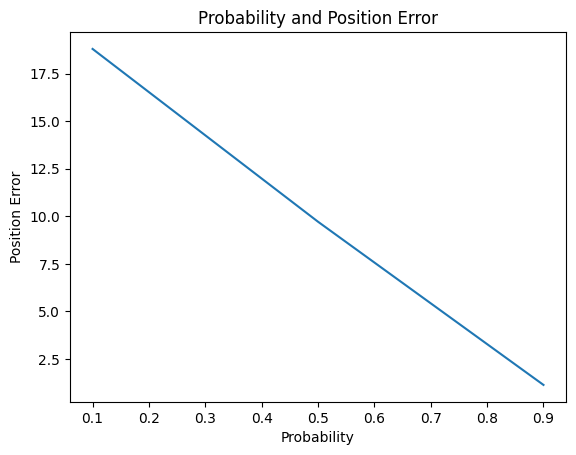

In [175]:
# 2.3

import matplotlib.pyplot as plt

# Create line graph
plt.plot(probablity, position_error_list)

# Add labels and title
plt.title('Probability and Position Error')
plt.xlabel('Probability')
plt.ylabel('Position Error')

# Display graph
plt.show()

In [102]:
# 3

import numpy as np

# B = np.array([[0.5a, 0.5a], [a+1, a]])           a is acceleration

mean = np.array([[5], [1]])
uncertain = np.array([[0, 0], [0, 0]])
A = np.array([[1, 1], [0, 1]])
B = np.array([[0, 0], [1, 0]])
G = np.array([[0.5], [1]])
U = np.array([[1], [0]])

mean = A @ mean + B @ U
uncertain = A @ uncertain @ A.T + G @ G.T
print("The value of mean is {}".format(mean))
print("The value of uncertain is {}".format(uncertain))


# the random variable should be the acceleration due to the wind effect.
# the normal distribution is N(mean, covariance) = N(0, 1)

The value of mean is [[6]
 [2]]
The value of uncertain is [[0.25 0.5 ]
 [0.5  1.  ]]


In [ ]:
# extra credit

import numpy as np
import random
import matplotlib.pyplot as plt

# Define initial state and uncertainties
m = np.array([[0], [0], [0], [0]])
c = np.array([[10, 0, 0, 0], [0, 10, 0, 0], [0, 0, 100, 0], [0, 0, 0, 100]])

# Define motion model and noise
A = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

# Define measurement model and noise
mm = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
mn = np.array([[10, 0], [0, 10]])

# Defin
# e arrays to store position and error values
true_pos_list = []
est_pos_list = []
error_list = []

# Loop through time steps
for t in range(30):
    # Predict new state and uncertainty
    m = A @ m
    c = A @ c @ A.T + B

    # Simulate measurement
    true_z = mm @ m + np.random.multivariate_normal([0, 0], mn)
    true_pos_list.append(true_z)

    # Update state and uncertainty using Kalman filter
    K = c @ mm.T @ np.linalg.inv(mm @ c @ mm.T + mn)
    m = m + K @ (true_z - mm @ m)
    c = (np.eye(4) - K @ mm) @ c

    # Store estimated position and error
    est_pos_list.append(m[0:2])
    error_list.append(np.linalg.norm(m[0:2] - true_z))

# Convert position arrays to numpy arrays for plotting
true_pos = np.array(true_pos_list)
est_pos = np.array(est_pos_list)

# Plot true and estimated positions
plt.plot(true_pos[:, 0], true_pos[:, 1], label='True position')
plt.plot(est_pos[:, 0], est_pos[:, 1], label='Estimated position')
plt.legend()
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

# Plot position error
plt.plot(error_list)
plt.xlabel('Time step')
plt.ylabel('Position error')
plt.show()

In [ ]:
# above is for extra credit